## 0.0 Importing libraries and defining functions

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as scp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from datetime import datetime as dt
from IPython.core.display import HTML
import plotly.express as px
from IPython.display import display
import time
pd.set_option('display.float_format', lambda x: '%.1f' % x)


def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = (25,12)
    plt.rcParams['font.size'] = 24
    #display(HTML('<style>.container (width:100%,)'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows= None
    pd.set_option('display.expand_frame_repr', False)
    sns.set()

def data_collect(path):
    df = pd.read_csv(path)
    return df

def data_description(df):
    print('Variables:\n\n{}'.format(df.dtypes), end='\n\n')
    print('Number of rows {}'.format(df.shape[0]), end='\n\n')
    print('Number of columns {}'.format(df.shape[1]), end='\n\n')
    print('NA analysis'.format(end='\n'))
    for i in df.columns:
        print('column {}: {} {}'.format(i,df[i].isna().any(), df[i].isna().sum()))
        
def outliers_analysis_q75(df,column):
    df_result = df[df[column] >= 2*np.quantile(df[column], .75)].sort_values(ascending=False,by=[column])
    return df_result

def boxplot_analysis_quantitative(df,nrows,ncols):
    fig, axs = plt.subplots(nrows, ncols, figsize=(30,20))
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    
    for column,axis in zip(df.select_dtypes(exclude=[object]).columns, axs.flatten()):
        sns.boxplot(data=df.select_dtypes(exclude=[object]), y=column, ax=axis)
        axis.tick_params(axis='y', labelsize=15)
        axis.yaxis.label.set_fontsize(15)

def quantile_30(x):
    return x.quantile(0.3)
def quantile_40(x):
    return x.quantile(.4)
def quantile_60(x):
    return x.quantile(.6)
def quantile_75(x):
    return x.quantile(.75)

# 1.0 Data Wrangling

## 1.1 Data describing and analyzing

In [4]:
data = data_collect("kc_house_data.csv")
df = data.copy()
data_description(df)

Variables:

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Number of rows 21613

Number of columns 21

NA analysis
column id: False 0
column date: False 0
column price: False 0
column bedrooms: False 0
column bathrooms: False 0
column sqft_living: False 0
column sqft_lot: False 0
column floors: False 0
column waterfront: False 0
column view: False 0
column condition: False 0
column grade: False 0
column sqft_above: False 0
column sqft_basement: False 0
column yr_built: False 0
column yr_renovated: Fals

In [15]:
df.head()

,id,date,buying_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,median_buying_price
0,7129300520,20141013T000000,221900.0,3,1,1180.0,5650.0,1,0,0,...,1180.0,0.0,1955,0,98178,47.5,-122.3,1340.0,5650.0,278277.0
1,4060000240,20140623T000000,205425.0,2,1,880.0,6780.0,1,0,0,...,880.0,0.0,1945,0,98178,47.5,-122.2,1190.0,6780.0,278277.0
2,4058801670,20140717T000000,445000.0,3,2,2100.0,8201.0,1,0,2,...,1620.0,480.0,1967,0,98178,47.5,-122.2,2660.0,8712.0,278277.0
3,2976800796,20140925T000000,236000.0,3,1,1300.0,5898.0,1,0,0,...,1300.0,0.0,1961,0,98178,47.5,-122.3,1320.0,7619.0,278277.0
4,6874200960,20150227T000000,170000.0,2,1,860.0,5265.0,1,0,0,...,860.0,0.0,1931,0,98178,47.5,-122.3,1650.0,8775.0,278277.0


In [5]:
df.describe(exclude=[object])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,4580301520.9,540088.1,3.4,2.1,2079.9,15107.0,1.5,0.0,0.2,3.4,7.7,1788.4,291.5,1971.0,84.4,98077.9,47.6,-122.2,1986.6,12768.5
std,2876565571.3,367127.2,0.9,0.8,918.4,41420.5,0.5,0.1,0.8,0.7,1.2,828.1,442.6,29.4,401.7,53.5,0.1,0.1,685.4,27304.2
min,1000102.0,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,2123049194.0,321950.0,3.0,1.8,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0
50%,3904930410.0,450000.0,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0
75%,7308900445.0,645000.0,4.0,2.5,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0
max,9900000190.0,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0


In [10]:
df['condition'] = df['condition'].astype(int)
df['price'] = df['price'].astype(float)
df['sqft_living'] = df['sqft_living'].astype(float)
df['sqft_lot'] = df['sqft_lot'].astype(float)
df['sqft_above'] = df['sqft_above'].astype(float)
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['sqft_living15'] = df['sqft_living15'].astype(float)
df['sqft_lot15'] = df['sqft_lot15'].astype(float)
df['floors'] = df['floors'].apply(lambda x: 1 if 1 <= x < 2 else 2 if 2 <= x < 3 else 3).astype(str)
df['bathrooms'] = df['bathrooms'].apply(lambda x: round(x,0)).astype(int)
df = df.drop(['lat','long','grade'],axis=1)
df = df.rename({'price':'selling_price'}, axis=1)


#### bedrooms
There is a house with 33 bedrooms. Probably a typing error

#### bathrooms
In this columns there are decimal numbers, which does not make sense.

#### sqft_lot
There is a house with a huge lot (1651359 square feet). Probably another typing error.

#### floors
In this columns there are decimal numbers too.

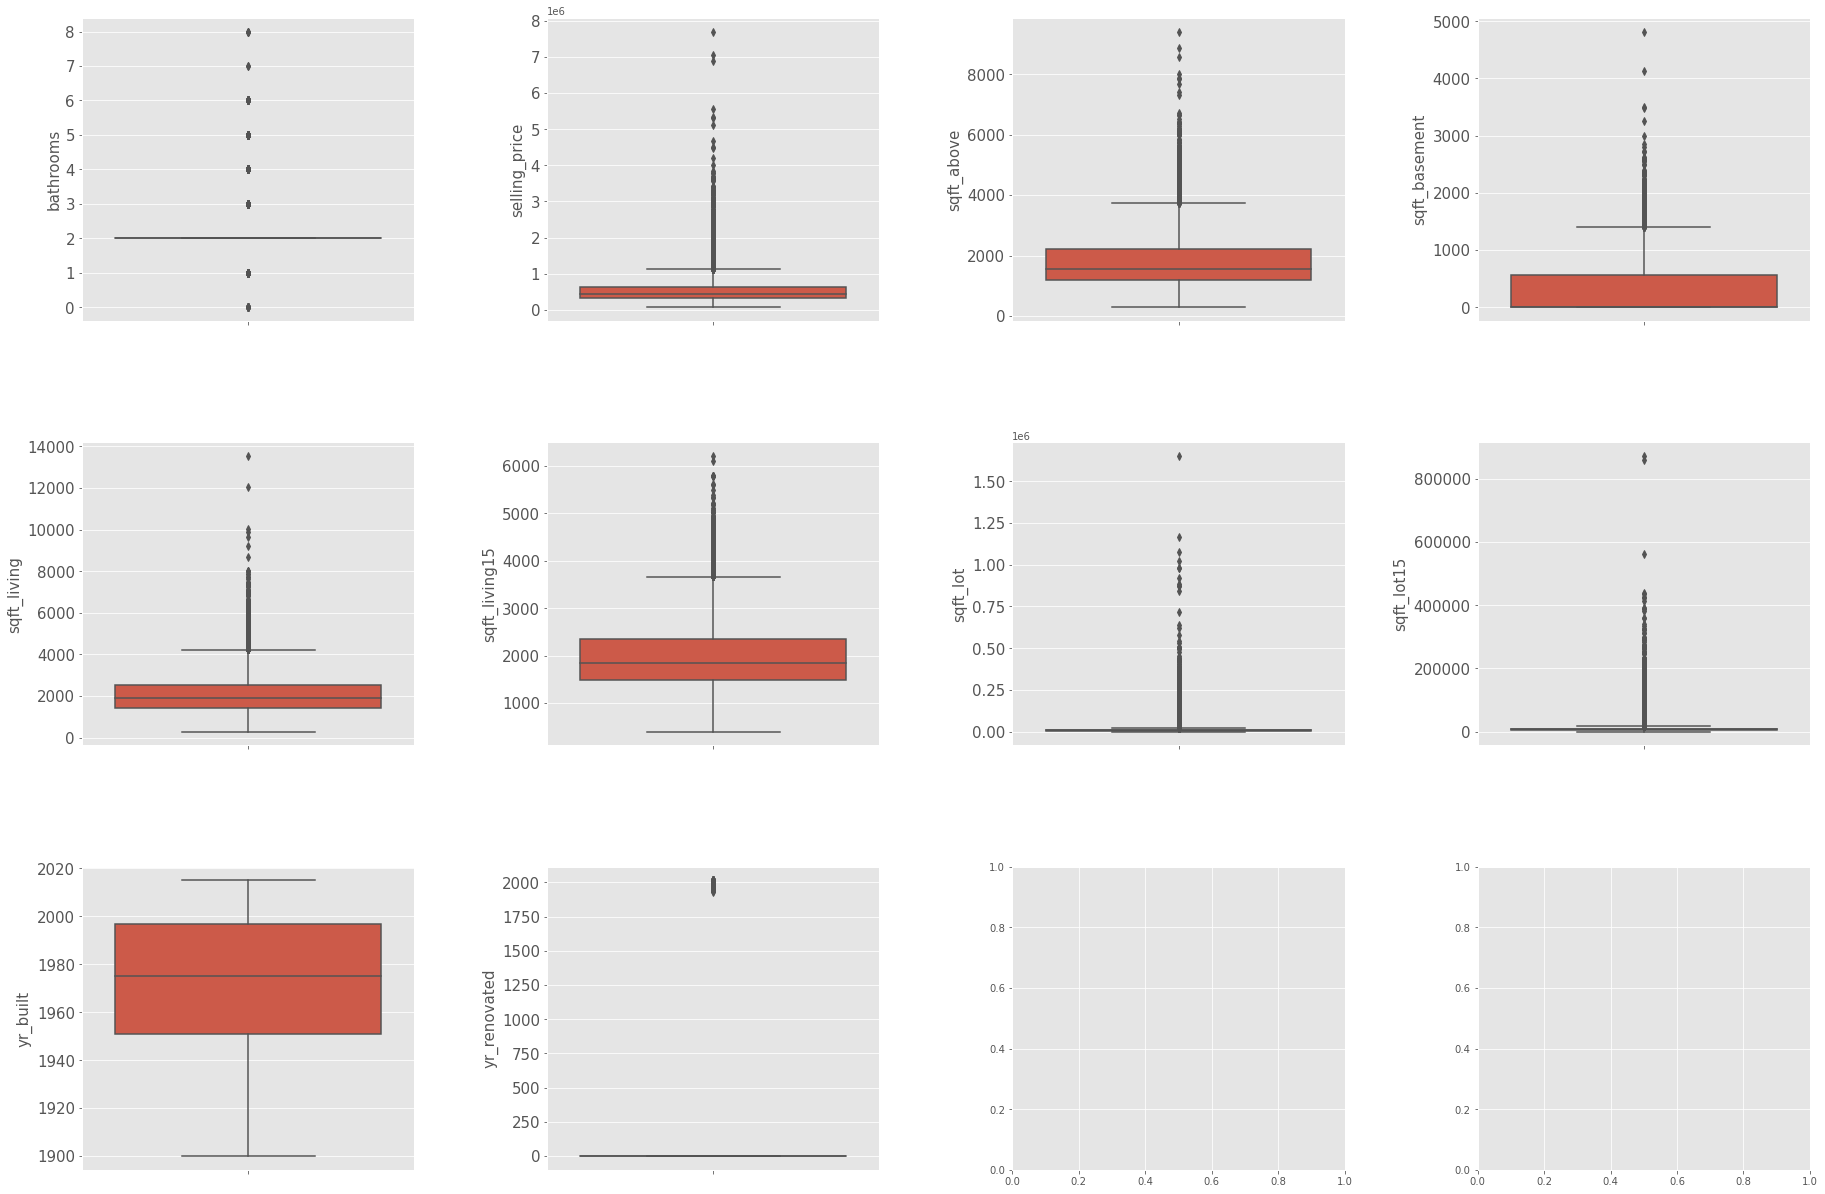

In [11]:
plt.style.use('ggplot')
boxplot_analysis_quantitative(df[df.columns.difference(['id','zipcode','view','condition','waterfront', 'bedrooms', 'floors'])],3,4)

<Figure size 1440x720 with 0 Axes>

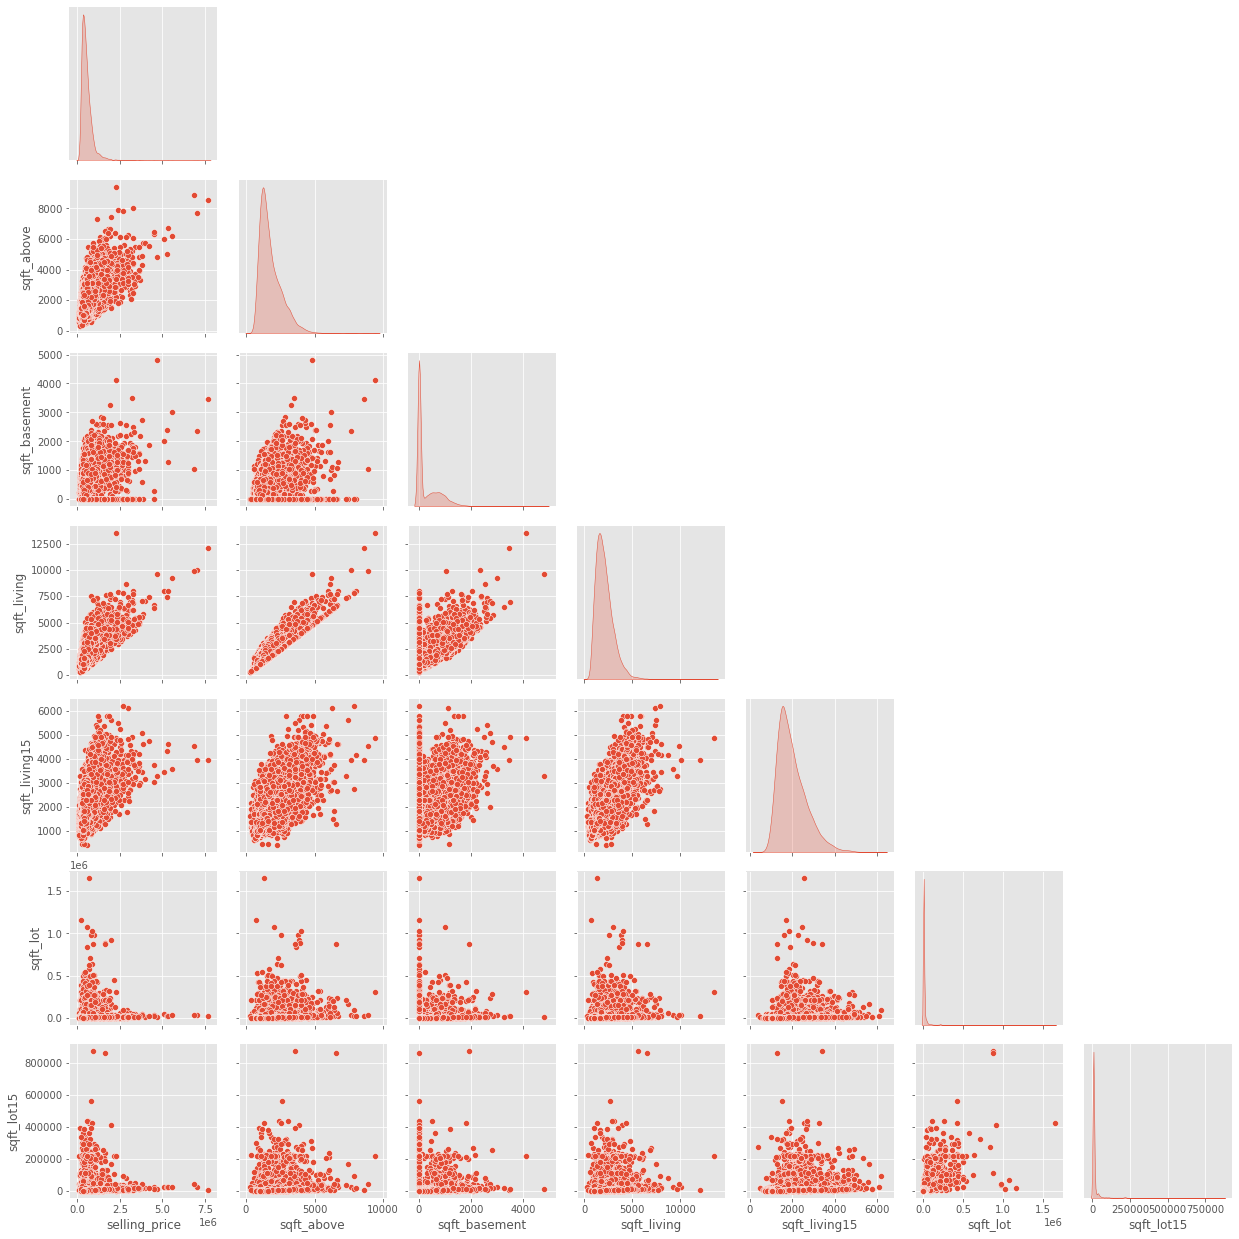

In [12]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
sns.pairplot(df[df.columns.difference(['id','zipcode'])].select_dtypes(include=([float])),
            corner=True, diag_kind='kde');

/tmp/ipykernel_9568/4073729508.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  pearson_corr.set_yticklabels(pearson_corr.get_yticklabels(), fontsize=30)
/tmp/ipykernel_9568/4073729508.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  kendall_corr.set_yticklabels(kendall_corr.get_yticklabels(), fontsize=30)


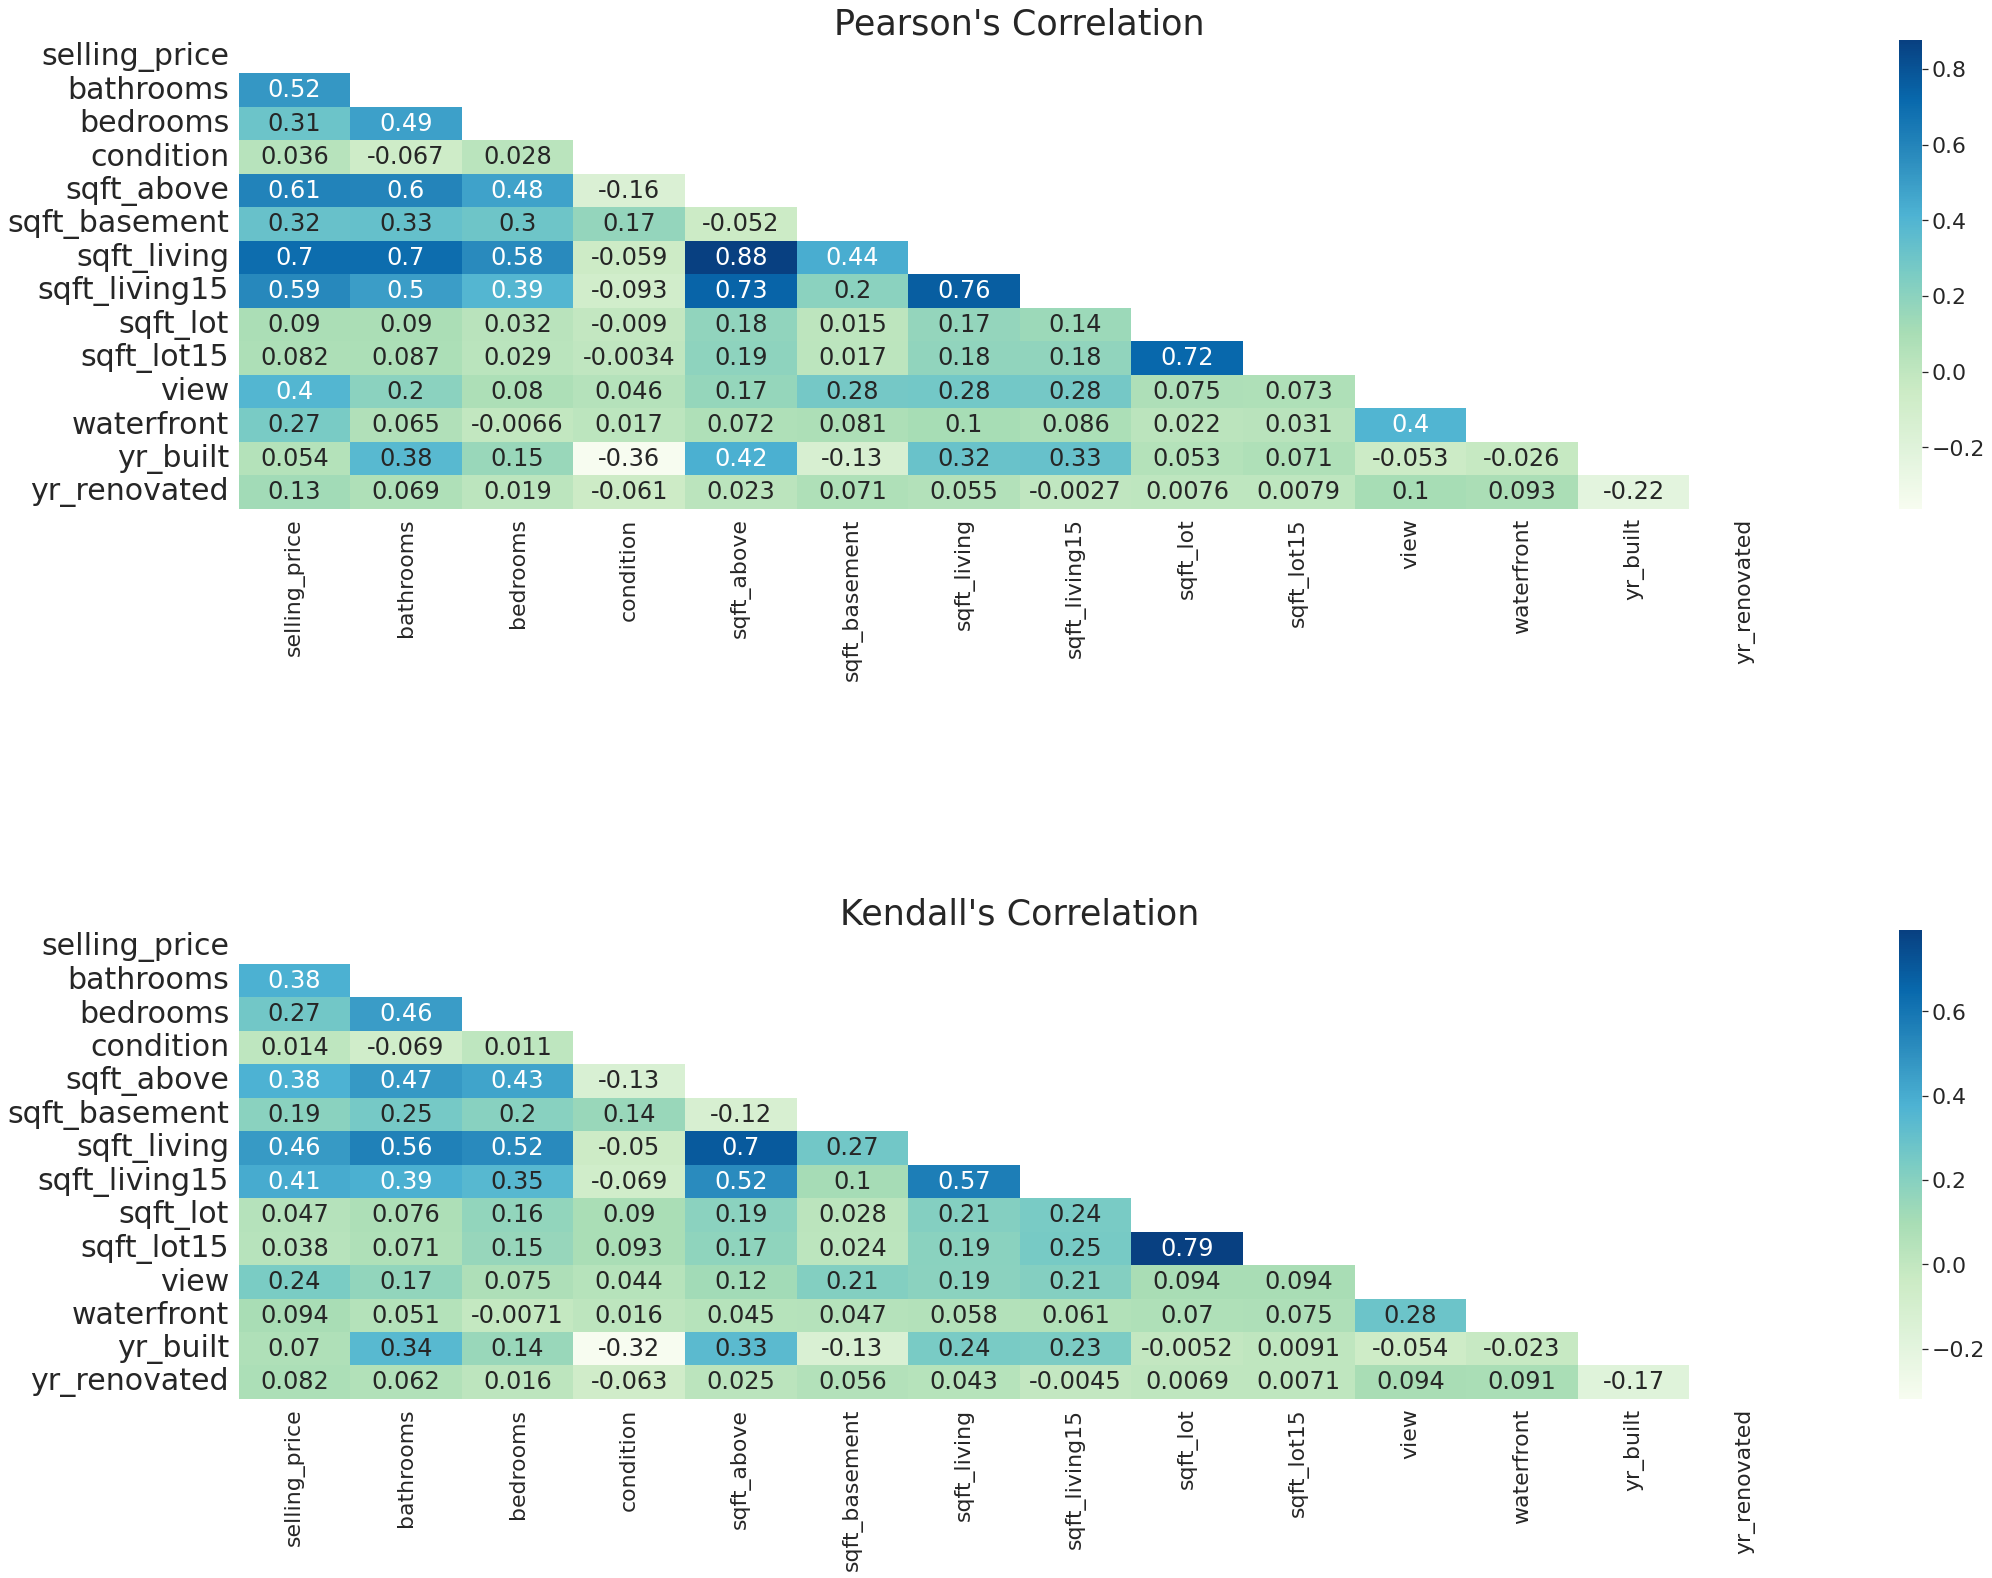

In [13]:
df_corr_pearson = df[df.columns.difference(['id','zipcode'])].select_dtypes(include=([float,int])).corr()
df_corr_pearson = df_corr_pearson.reindex(['selling_price'] + list([a for a in df_corr_pearson.columns if a != 'selling_price']), columns=(['selling_price'] + list([a for a in df_corr_pearson.columns if a != 'selling_price']) ))
mask_pearson = np.triu(np.ones_like(df_corr_pearson
, dtype=bool))

df_corr_kendall = df[df.columns.difference(['id','zipcode'])].select_dtypes(include=([float,int])).corr('kendall')
df_corr_kendall = df_corr_kendall.reindex(['selling_price'] + list([a for a in df_corr_kendall.columns if a != 'selling_price']), columns=(['selling_price'] + list([a for a in df_corr_kendall.columns if a != 'selling_price']) ))
mask_kendall = np.triu(np.ones_like(df_corr_kendall
, dtype=bool))

plt.rcParams.update({'figure.subplot.hspace':.9})
plt.style.use('ggplot')
sns.set(style="whitegrid", font_scale=2)
fig = plt.figure(figsize=(35,25))
specs = gridspec.GridSpec(ncols=1,nrows=2, figure=fig)
pearson_corr = fig.add_subplot(specs[0,0])
kendall_corr = fig.add_subplot(specs[1,0])
pearson_corr.set_title('Pearson\'s Correlation', fontsize=35)
kendall_corr.set_title('Kendall\'s Correlation', fontsize=35)
pearson_corr.set_yticklabels(pearson_corr.get_yticklabels(), fontsize=30)
kendall_corr.set_yticklabels(kendall_corr.get_yticklabels(), fontsize=30)

sns.heatmap(df_corr_pearson,
annot=True, cmap="GnBu", linecolor='w', mask=mask_pearson, ax=pearson_corr);
sns.heatmap(df_corr_kendall,
    annot=True, cmap="GnBu", linecolor='w', mask=mask_kendall, ax=kendall_corr,);

## 1.2 Analysing/Editing/Excluding Outliers

In [14]:
df[df['bedrooms'] >= 2*np.quantile(df['bedrooms'], .75)]
df['bedrooms'] = df['bedrooms'].replace(33,3)


In [15]:
outliers_analysis_q75(df,'sqft_lot')
df['sqft_lot'] = df['sqft_lot'].replace(1651359, 425581)


## 1.3 Transforming and creating variables

#### Creating the median selling price by zip code
#### Creating the season columns based on data, as there is a sasonality in house prices
#### Creating 'house age' columns with 'old' and 'new outcomes
#### Creating 'condition' column with  'good', 'bad and 'regular' score
#### Creating 'is renovated'  column with 'yes' and 'no outcomes
#### Creating  'renovation year' classification
#### Creating  'is waterfront column' with 'yes' and 'no' outcomes

In [16]:
df2 = df[['selling_price','zipcode']].groupby('zipcode').median().reset_index().rename({'selling_price':'median_selling_price'}, axis=1)
df = pd.merge(df,df2, on='zipcode', how='inner')
#df['selling_price'] = df.apply(lambda x: x['buying_price']*1.1 if x['buying_price'] > x['median_selling_price']
 #                                                                else x['buying_price']*1.3, axis=1)

df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df['season'] = pd.to_datetime(df['date']).dt.strftime('%m-%d').apply(lambda x:
                'Spring' if '03-21' <= x < '06-21'
                else 'Summer' if '06-21' <= x < '09-21'                                                   
                else 'Autunm' if '09-21' <= x < '12-21'
                else 'Winter' )

df['house_age'] = np.where(df['yr_built'] >= 2010, 'new', 'old')
df['yr_built'] = pd.to_datetime(df['yr_built'], format= "%Y").dt.strftime('%Y').astype(int)



df['condition_type'] = df['condition'].apply(lambda x: 'bad' if x <= 2
                                                   else 'regular' if (x ==3) | (x==4)
                                                 else 'good')

df['yr_renovated'] = (df['yr_renovated'].apply(
lambda x: pd.to_datetime('1900-01-01', format = '%Y-%m-%d') if x == 0 
else pd.to_datetime(x, format= "%Y-%m-%d"))).dt.strftime('%Y').astype(int)
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 'no' if x == 1900 else 'yes')
df['is_waterfront'] = df['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')


# 2.0 Exploratory Data Analysis

## 2.1 Categorical analysis

   ### 2.1.1 Buying prices by condition type (with hypothesis test)

  condition_type selling_price                                 
                   quantile_30 quantile_40   median quantile_60
0            bad      201470.0    236250.0 277000.0    311200.0
1           good      379950.0    440000.0 526000.0    599995.0
2        regular      345000.0    397500.0 450000.0    514000.0
Krukal-Wallis Test: p-values is 6.105256290767117e-51
Mann-Whitney Test betwenn bad and good condition selling price: p-values is 7.588664352530088e-42
Mann-Whitney Test betwenn regular and good condition selling price: p-values is 1.3662109122759977e-17


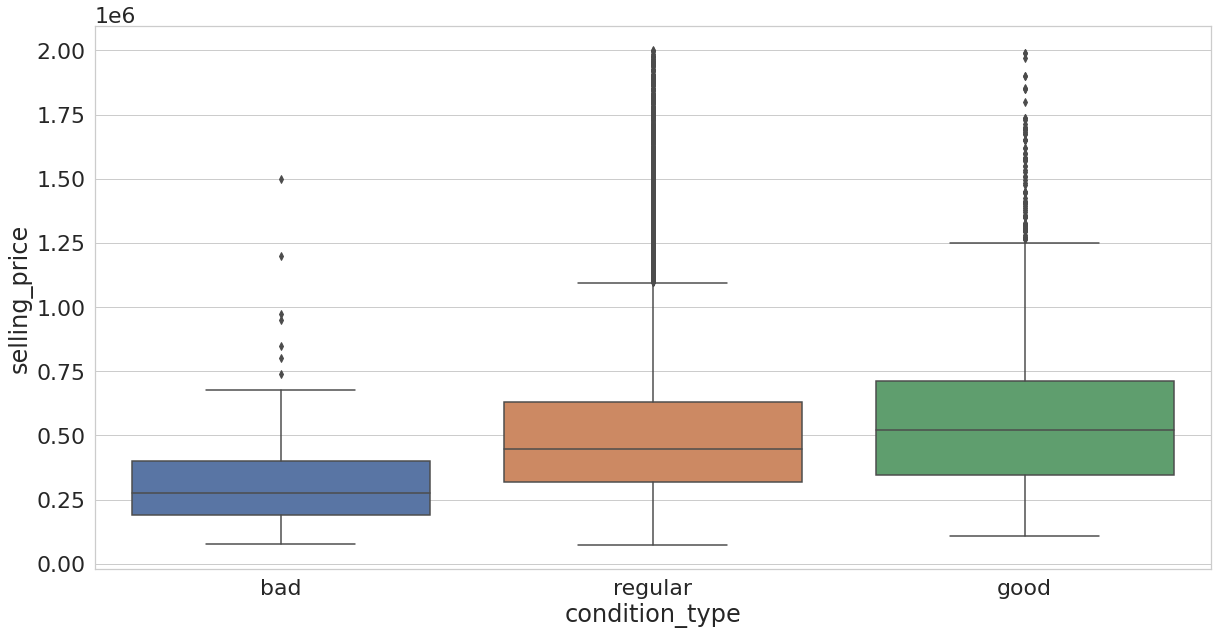

In [17]:
fig = plt.figure(figsize=(20,10))

sns.boxplot(data=df[df['selling_price'] < 2000000], y='selling_price', x='condition_type', order=['bad','regular','good']);
print(df[['condition_type', 'selling_price']].groupby('condition_type').agg(
    [quantile_30,quantile_40,'median',quantile_60]).reset_index())
print('Krukal-Wallis Test:', 'p-values is {}'.format(scp.stats.kruskal(df.loc[df['condition_type'] == 'bad','selling_price'],
                 df.loc[df['condition_type'] == 'regular','selling_price'],
                 df.loc[df['condition_type'] == 'good','selling_price']).pvalue))
print('Mann-Whitney Test betwenn bad and good condition selling price:', 
'p-values is {}'.format(scp.stats.mannwhitneyu(df.loc[df['condition_type'] == 'bad','selling_price'], 
                    df.loc[df['condition_type'] == 'good','selling_price'], alternative='less').pvalue))
print('Mann-Whitney Test betwenn regular and good condition selling price:', 
'p-values is {}'.format(scp.stats.mannwhitneyu(df.loc[df['condition_type'] == 'regular','selling_price'], 
            df.loc[df['condition_type'] == 'good','selling_price'], alternative='less').pvalue))



Reject that medians are equal.

Suggestions: The difference between a bad and good condition properties is considerably high.
#This way a suggestion is buying bad houses and reform them. 

### 2.1.2 Boxplot of selling prices by waterfront view

,is_waterfront,selling_price
0,no,450000.0
1,yes,1400000.0


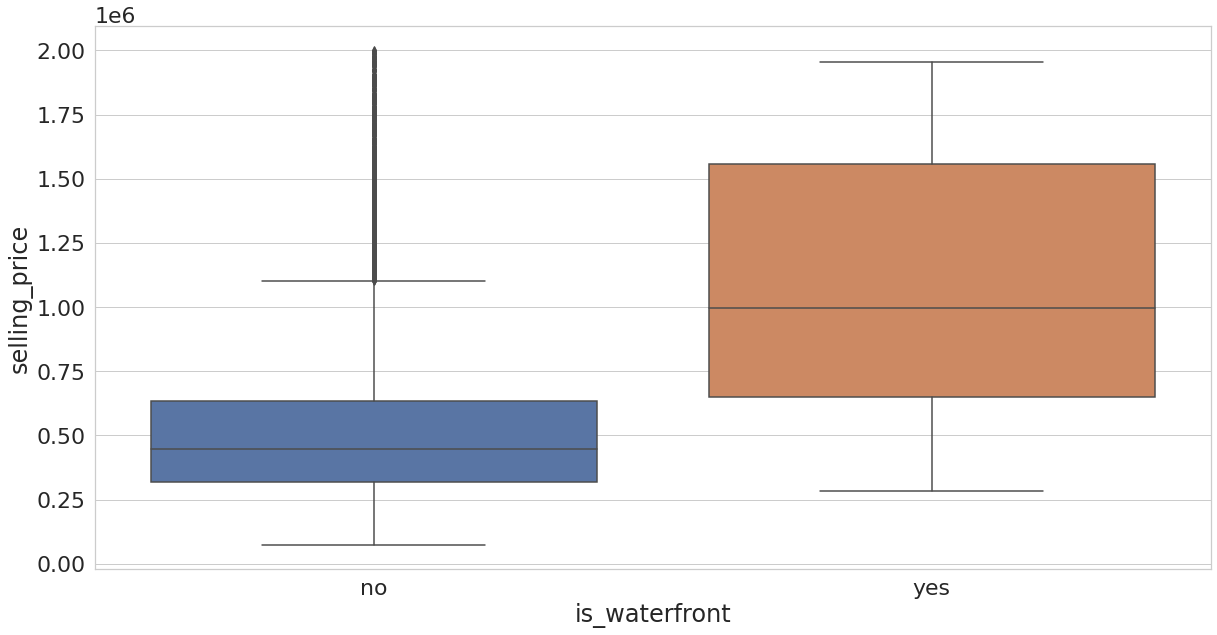

In [18]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=df[df['selling_price'] < 2000000], y='selling_price', x='is_waterfront');
df[['is_waterfront', 'selling_price']].groupby('is_waterfront').median().reset_index()


### 2.1.3 Boxplot of selling prices by house_age

,house_age,selling_price
0,new,539950.0
1,old,448000.0


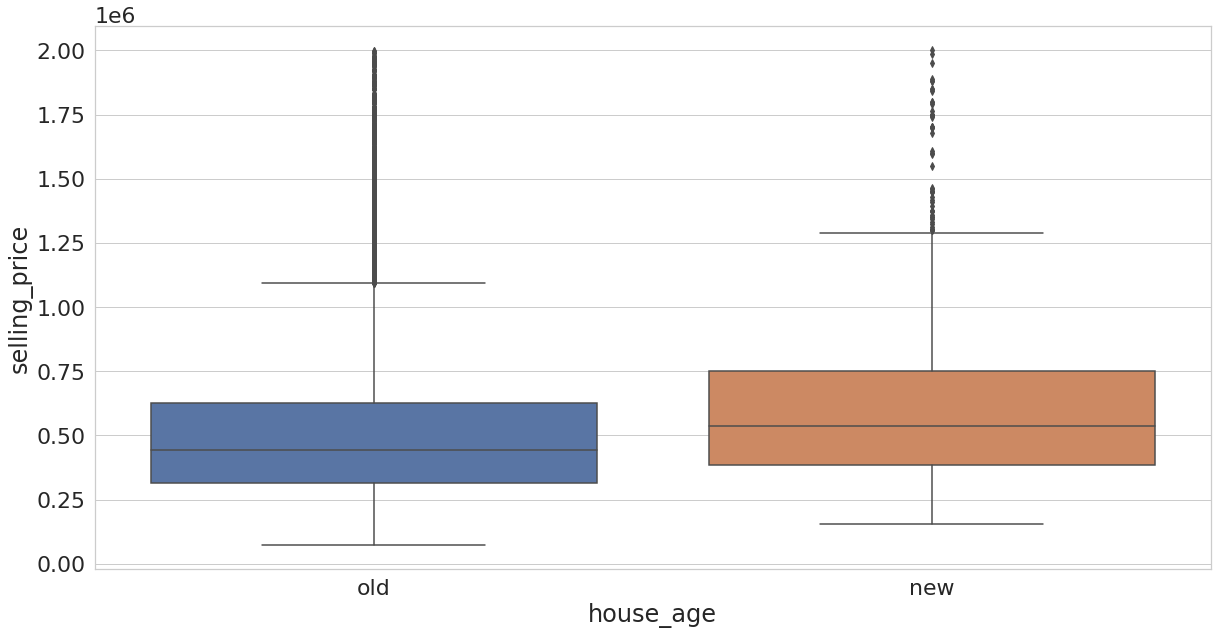

In [19]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=df[df['selling_price'] < 2000000], y='selling_price', x='house_age');
df[['house_age', 'selling_price']].groupby('house_age').median().reset_index()


### 2.1.4 Boxplot of selling prices by is_renovated 

,is_renovated,selling_price
0,no,448000.0
1,yes,600000.0


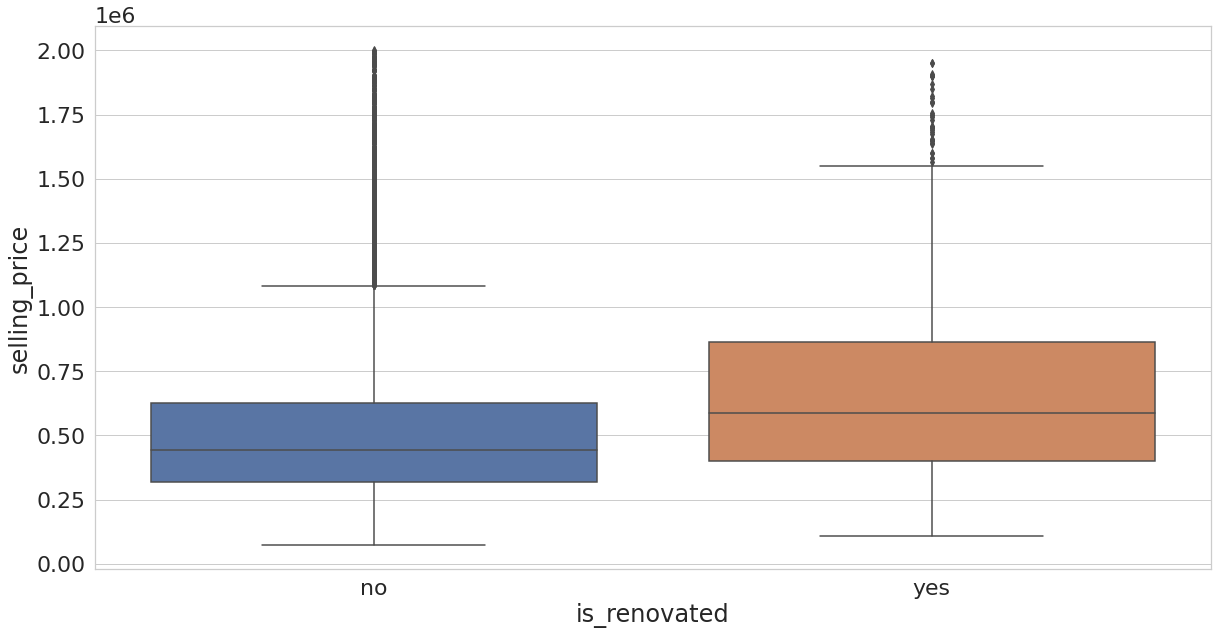

In [20]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=df[df['selling_price'] < 2000000], y='selling_price', x='is_renovated');
df[['is_renovated', 'selling_price']].groupby('is_renovated').median().reset_index()


### 2.1.5 Boxplot of selling prices by floors

,floors,selling_price
0,1,402500.0
1,2,547750.0
2,3,492000.0


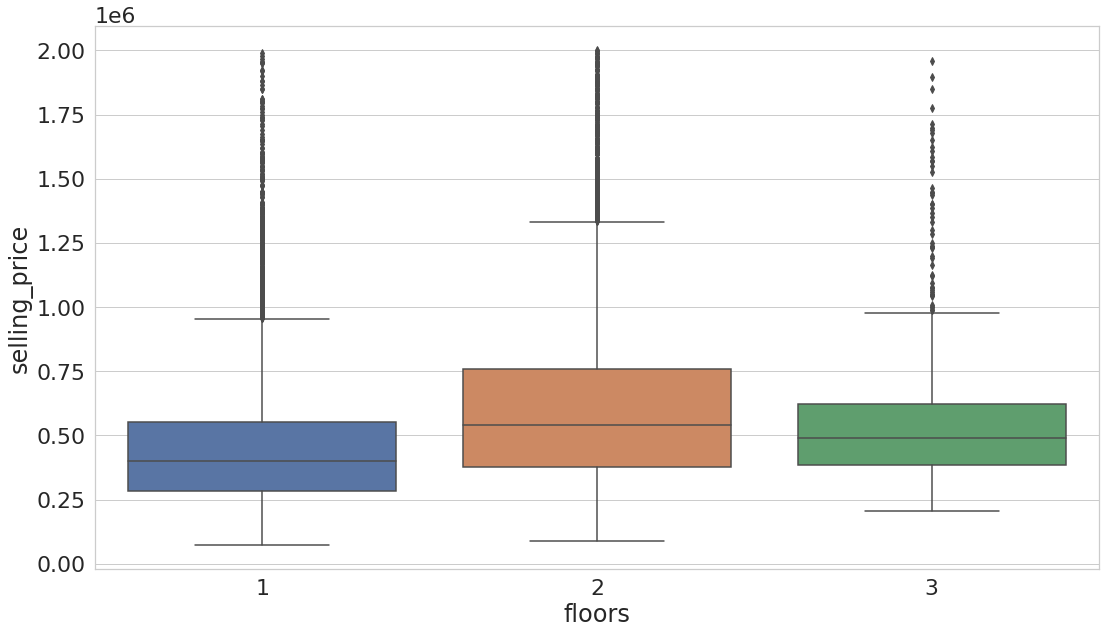

In [21]:
fig = plt.figure(figsize=(18,10))
sns.boxplot(data=df[df['selling_price'] < 2000000], y='selling_price', x='floors')

df[['floors', 'selling_price']].groupby('floors').median().reset_index()


### 2.1.6 Boxplot of selling prices by season (with hypothesis tests)

   season  selling_price
0  Autunm       437925.0
1  Spring       470000.0
2  Summer       450000.0
3  Winter       435000.0
Krukal-Wallis Test: p-value is 1.4041579756327225e-14
Mann-Whitney Test betwenn Summer and Winter season selling price: p-value is 2.4583637716738183e-05
Mann-Whitney Test betwenn Spring and Summer season selling price: p-value is 0.00036637150104096696
Mann-Whitney Test betwenn Autunm and Winter season selling price: p-value is 0.15408547785073712


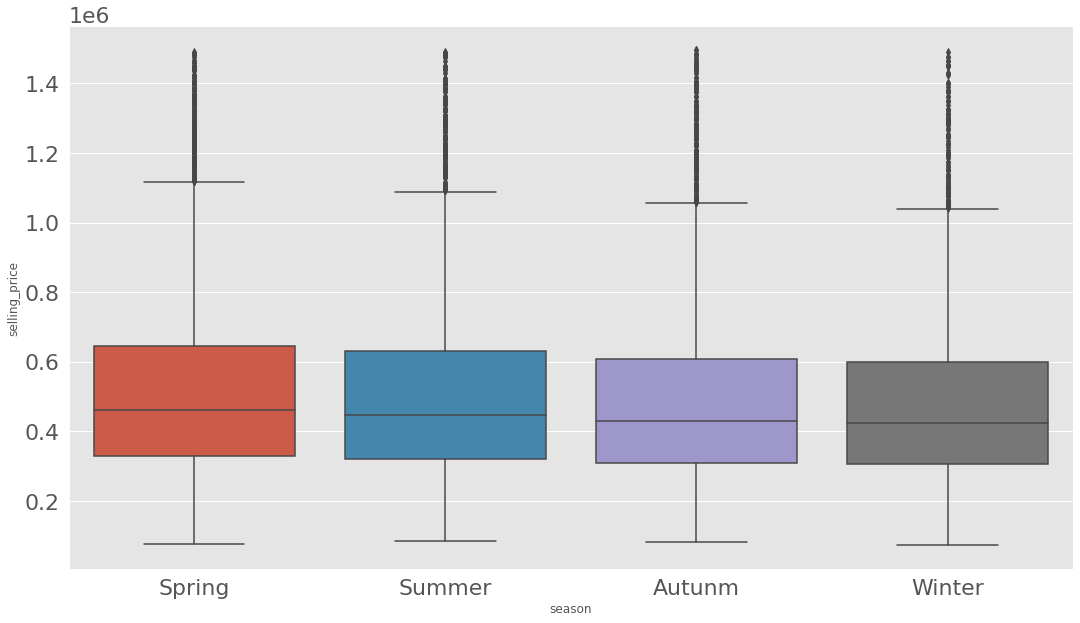

In [22]:
fig = plt.figure(figsize=(18,10))
plt.style.use('ggplot')
season_order = ['Spring','Summer','Autunm','Winter']
sns.boxplot(data=df[df['selling_price'] < 1500000], y='selling_price', x='season', order=season_order);
print(df[['season', 'selling_price']].groupby('season').median().reset_index())


print('Krukal-Wallis Test:', 'p-value is {}'.format(scp.stats.kruskal(df.loc[df['season'] == 'Summer','selling_price'],
                 df.loc[df['season'] == 'Autunm','selling_price'],
                 df.loc[df['season'] == 'Spring','selling_price'],
                 df.loc[df['season'] == 'Winter','selling_price']).pvalue))
 
print('Mann-Whitney Test betwenn Summer and Winter season selling price:', 
'p-value is {}'.format(scp.stats.mannwhitneyu(df.loc[df['season'] == 'Summer','selling_price'], 
           df.loc[df['season'] == 'Winter','selling_price'], alternative='greater').pvalue))

print('Mann-Whitney Test betwenn Spring and Summer season selling price:', 
'p-value is {}'.format(scp.stats.mannwhitneyu(df.loc[df['season'] == 'Spring','selling_price'], 
           df.loc[df['season'] == 'Summer','selling_price'], alternative='greater').pvalue))

print('Mann-Whitney Test betwenn Autunm and Winter season selling price:', 
'p-value is {}'.format(scp.stats.mannwhitneyu(df.loc[df['season'] == 'Autunm','selling_price'], 
           df.loc[df['season'] == 'Winter','selling_price'], alternative='greater').pvalue))





We can reject the hypothesis that the median of selling price by season is not equal.

Also, post hoc comparisons between two seasons confirms that in fact are not equal, except
in autunm and winter. On theses seasons, we cannot reject the hypothesis that selling prices
median is equal.

The season with most median prices is spring.

A suggestion is buying houses on winter or autunm and sell them on spring.

## 2.2 Insights

### 2.2.1 Properties in good condition with 3 floors is 20% more expensive, on median, than regular condition properties


,floors,condition_type,selling_price
0,1,bad,269950.0
1,1,good,470000.0
2,1,regular,399950.0
3,2,bad,355000.0
4,2,good,855050.0
5,2,regular,540000.0
6,3,good,977500.0
7,3,regular,490000.0


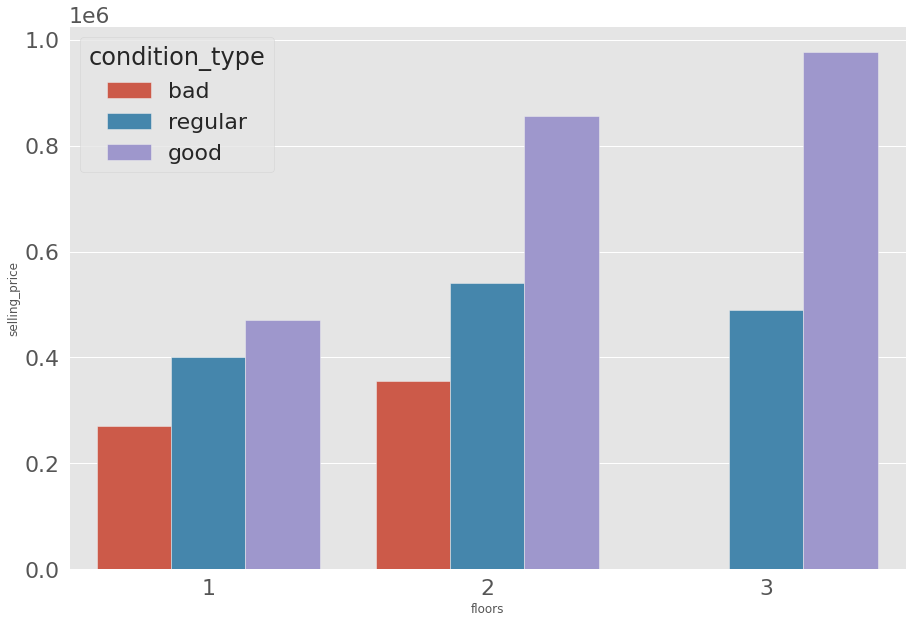

In [24]:
df_floors = df[['floors', 'selling_price','condition_type']].groupby(['floors','condition_type']).median().reset_index()
fig = plt.figure(figsize=(15,10))
plt.style.use('ggplot')
condition_order = ['bad', 'regular','good']
sns.barplot(x='floors', y='selling_price',hue='condition_type',hue_order=condition_order, data=df_floors);
df_floors


True. In fact, good condition selling price median is almost twice higher than
regular condition median selling price. Which means there is a great gap which one can spend money in making improvements in regular properties to sell them as good ones. 

As they are regular,those costs would not be much. 

However, the profit that a company could get is considerably high.

### 2.2.2 Properties which are in good and regular condition and was renovated is 20% more expensive, on median, than regular or good condition properties which was not


,is_renovated,condition_type,selling_price
0,no,good,525000.0
1,no,regular,445000.0
2,yes,good,733000.0
3,yes,regular,600000.0


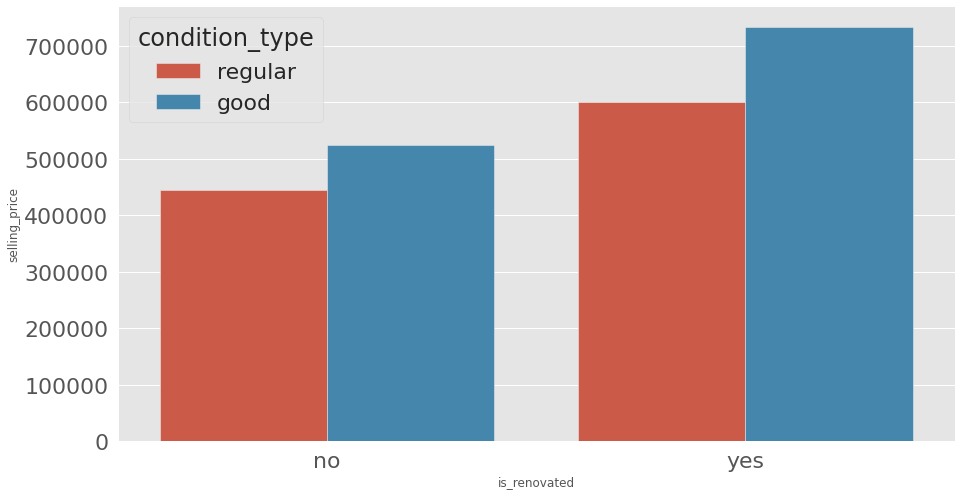

In [25]:
df_renovated = df.loc[(df['condition_type'] == 'regular') | (df['condition_type'] == 'good'),['is_renovated','selling_price', 'condition_type']].groupby(['is_renovated','condition_type']).median().reset_index()
fig = plt.figure(figsize=(15,8))
plt.style.use('ggplot')
condition_order = ['regular','good']
sns.barplot(x='is_renovated', y='selling_price', data=df_renovated, hue='condition_type',
            hue_order=condition_order);
df_renovated



True. In fact, renovated good contition properties are 26% more expensive than the not renovated ones. This means that the company could acquire some non renovated houses, make some improvements on them that cost at most 13% of their selling price, for instance. 

After that, selling them for 25% more than their selling price. Doing that they could make good profit

### 2.2.3 New houses without renovation is 15% more expensive, on median, than old renovated houses


,condition_house,selling_price
0,new without renovation,539950.0
1,old with renovation,600000.0


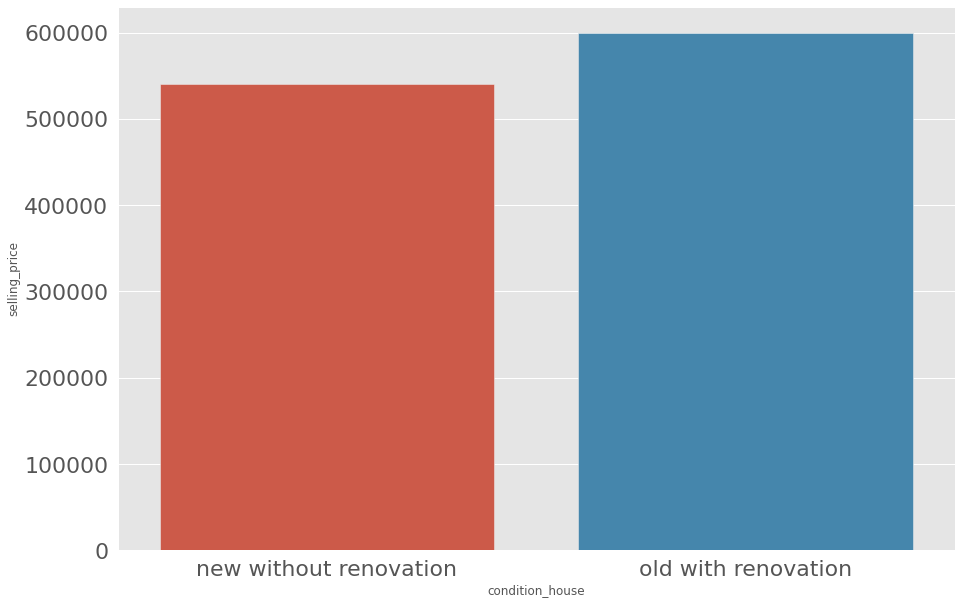

In [26]:
df_new_houses = df.loc[((df['is_renovated'] == 'no') & (df['house_age'] == 'new')) 
    | ((df['is_renovated'] == 'yes') & (df['house_age'] == 'old')),['selling_price', 'house_age']].groupby('house_age').median().reset_index()
df_new_houses['house_age'] = df_new_houses['house_age'].replace({'new': 'new without renovation','old': 'old with renovation'})
df_new_houses = df_new_houses.rename({'house_age': 'condition_house'}, axis=1)
fig = plt.figure(figsize=(15,10))
plt.style.use('ggplot')
sns.barplot(x='condition_house', y='selling_price', data=df_new_houses);
df_new_houses



False. Old renovation houses seems to be more worthy than new houses who has not been made improvements by approximately 10%.

A house is considered new when it was built at least at 2010. It confirms that there are good opportunities in getting a old house for a lower price, making improvements on them and selling them with a higher price than new ones.

### 2.2.4 Properties prices on spring is 15% higher than prices on summer, on median


   season  selling_price
0  Spring       470000.0
1  Summer       450000.0 
Percentual difference between median spring prices and median autunm prices is 4.26%


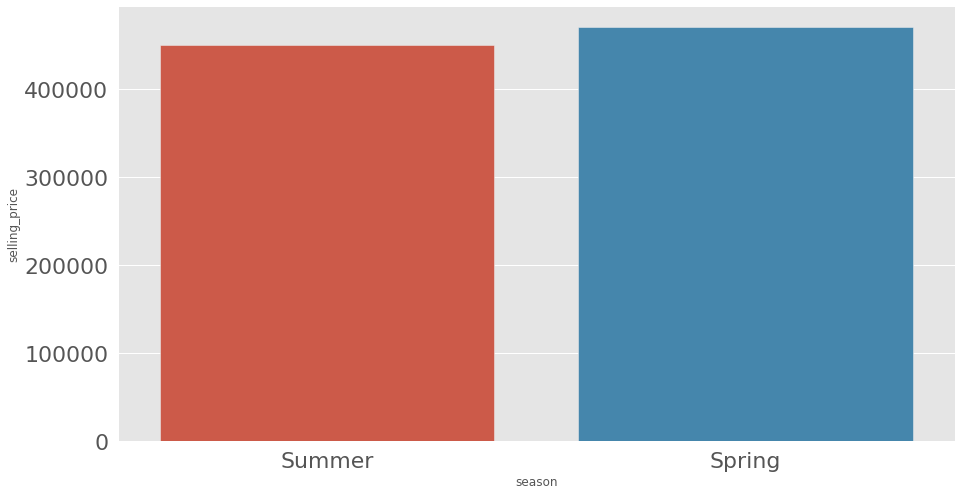

In [27]:
df_season_spring_summer = df.loc[(df['season'] == 'Spring') | (df['season'] == 'Summer'),['season','selling_price']].groupby('season').median().reset_index()
fig = plt.figure(figsize=(15,8))
plt.style.use('ggplot')
season_order = ['Summer','Spring']
sns.barplot(x='season', y='selling_price', data=df_season_spring_summer, order=season_order);
print(df_season_spring_summer,'\n' 
'Percentual difference between median spring prices and median autunm prices is {}%'.format(round((df_season_spring_summer.values[0][1]
 - df_season_spring_summer.values[1][1])/df_season_spring_summer.values[0][1]*100,2)))



False. Actually is approximately 4% higher than summer median.

This could happen due to high demand after winter season. 

These season should have the highest company buying prices. 

The company could consider that there is no differences in prices between theses season and selling properties with same price.

### 2.2.5 Properties prices on Spring is 10% higher than prices on autunm, on median.


   season  selling_price
0  Autunm       437925.0
1  Spring       470000.0 
Percentual difference between median spring prices and median autunm prices is 7.32%


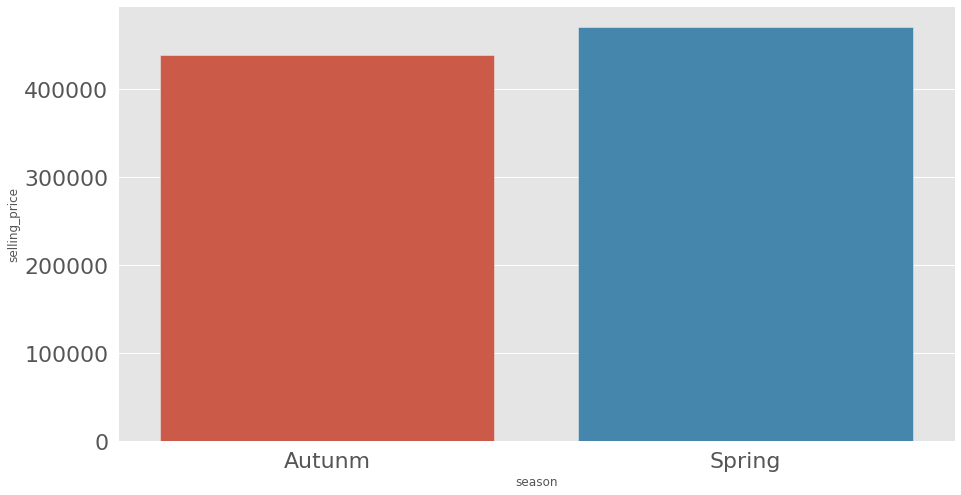

In [28]:
df_season_spring_autunm= df.loc[(df['season'] == 'Spring') | (df['season'] == 'Autunm'),['season','selling_price']].groupby('season').median().reset_index()
fig = plt.figure(figsize=(15,8))
plt.style.use('ggplot')
season_order = ['Autunm','Spring']
sns.barplot(x='season', y='selling_price', data=df_season_spring_autunm, order=season_order);
print(df_season_spring_autunm,'\n' 
'Percentual difference between median spring prices and median autunm prices is {}%'.format(round((df_season_spring_autunm.values[1][1]
 - df_season_spring_autunm.values[0][1])/df_season_spring_autunm.values[0][1]*100,2)))


False. In fact, is approximately 7,32% higher than autumn median. 
Here, a suggestion is putting different selling prices for these seasons.

## 3.0 Which properties company should buy and for what price?

Considering that company could buy properties to reform them. We propose the following:

#An ideia is buying bad condition houses that worth at most the 40 decile of buying prices of its
#region. The total spend money (house price + reform budget) should be at most the
30 decile of good houses of its region.

If a house has a regular or good condition,however, company can buy propeties that has
#price at most the 40 decile of regular or good condition house prices of its region. 


## 4.0 How much the company could spend to making improvements in each bad properties?

For bad condition properties:

The company could spend at most the 30 decile of good condition properties of its region  -
property selling price.


## 5.0 After buy them, when to sell them and for how much?

Considering two scenarios:

Minimum selling price:
Would be the 40th decile of good condition properties buying price of its region, considering
the season which the house will be selled as well, in case of bad condition properties.

Would be the median of regular condition properties buying price of its region,considering
the season which the house will be selled as well, in case of regular condition properties.

Would be the median of good condition properties buying price of its region,considering
the season which the house will be selled as well, in case of regular condition properties.


Suggested selling price:
For bad condition properties which were reformed:

Would be the median of good condition properties buying prices of its region, considering
the season which the house will be selled as well.
In case there is no good condition properties on sold in some region, will be considered the 60th decile of regular condition properties buying prices of this region.


For regular condition properties:

Would be the 60th decile of regular condition properties buying price of its region, considering the season which the house will be selled as well. 
In case there is no regular condition properties on sold in some region, will be
considered the 40th decile of good condition properties buying prices of this region.
 
 
For good condition properties:
 
Would be the 60th decile of good condition properties buying price of its region, considering
the season which the house will be selled as well, in case of good condition properties. In case there is no good condition properties on sold in some region, will be
considered the 75th quantile of regular condition properties buying prices of this region.

## 6.0 How much profit company would make per house selled?

Considering two scenarions:

Minimum profit
The difference between the minimum selling price minus buying price of that property.

Expected profit
The difference between the suggested selling price minus buying price of that property.